In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

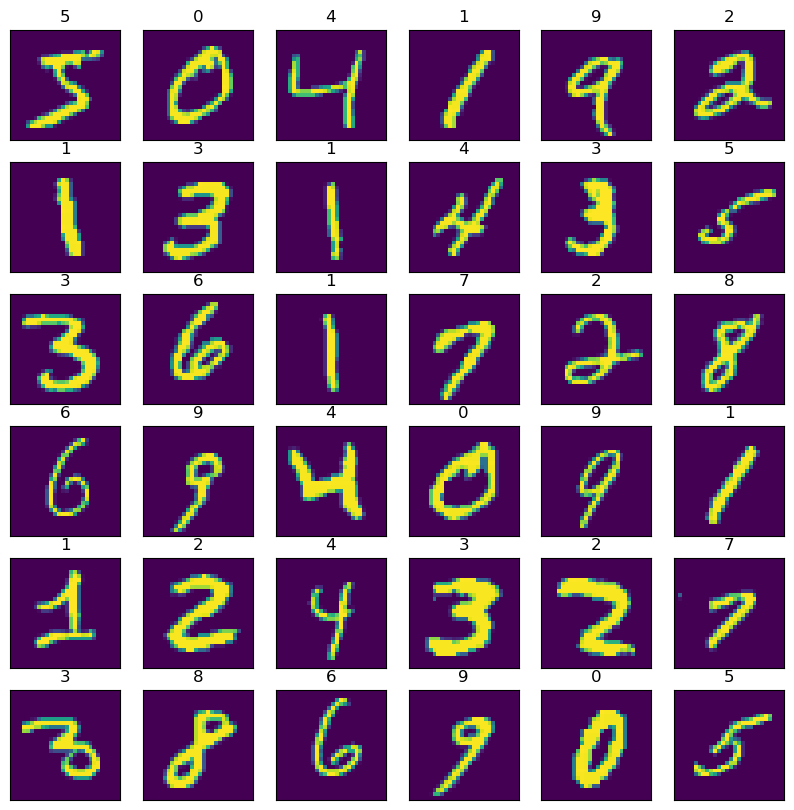

In [4]:
import matplotlib.pyplot as plt

class_names = ['0','1','2','3','4','5','6','7','8','9']

plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

In [5]:
x_train=x_train/255
x_test=x_test/255

In [6]:
from sklearn.model_selection import train_test_split

x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state=4)

In [7]:
image_shape = (28,28,1)
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

In [8]:
from keras.models import Sequential

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 10
input_shape = (28, 28, 1)
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape))

model.add(Conv2D(32, (3,3), activation='relu'))

model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))

model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [9]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

In [10]:
#Train the model

history = model.fit(x_train, y_train, epochs=30, validation_data=(x_validate, y_validate))

Epoch 1/30


2023-06-10 05:27:17.228609: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1500/1500 [==============================] - 26s 7ms/step - loss: 0.2042 - acc: 0.9349 - val_loss: 0.0517 - val_acc: 0.9839
Epoch 2/30
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0715 - acc: 0.9788 - val_loss: 0.0439 - val_acc: 0.9867
Epoch 3/30
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0563 - acc: 0.9832 - val_loss: 0.0380 - val_acc: 0.9873
Epoch 4/30
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0454 - acc: 0.9864 - val_loss: 0.0326 - val_acc: 0.9898
Epoch 5/30
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0406 - acc: 0.9872 - val_loss: 0.0287 - val_acc: 0.9908
Epoch 6/30
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0352 - acc: 0.9896 - val_loss: 0.0247 - val_acc: 0.9918
Epoch 7/30
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0314 - acc: 0.9907 - val_loss: 0.0296 - val_acc: 0.9920
Epoch 8/30
1500/1500 [==============================] - 8s 5ms/step - lo

Text(0.5, 1.0, 'Train - Accuracy')

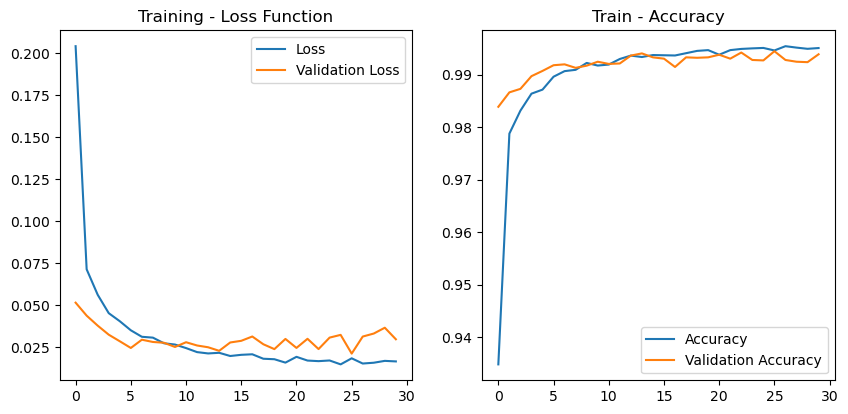

In [11]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['acc'], label='Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [12]:
score = model.evaluate(x_test,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.0257
Test Accuracy : 0.9944


In [14]:
import numpy as np

# Generate predictions
predicted = model.predict(x_test)
predicted_classes = np.argmax(predicted, axis=-1)

313/313 [==============================] - 1s 2ms/step


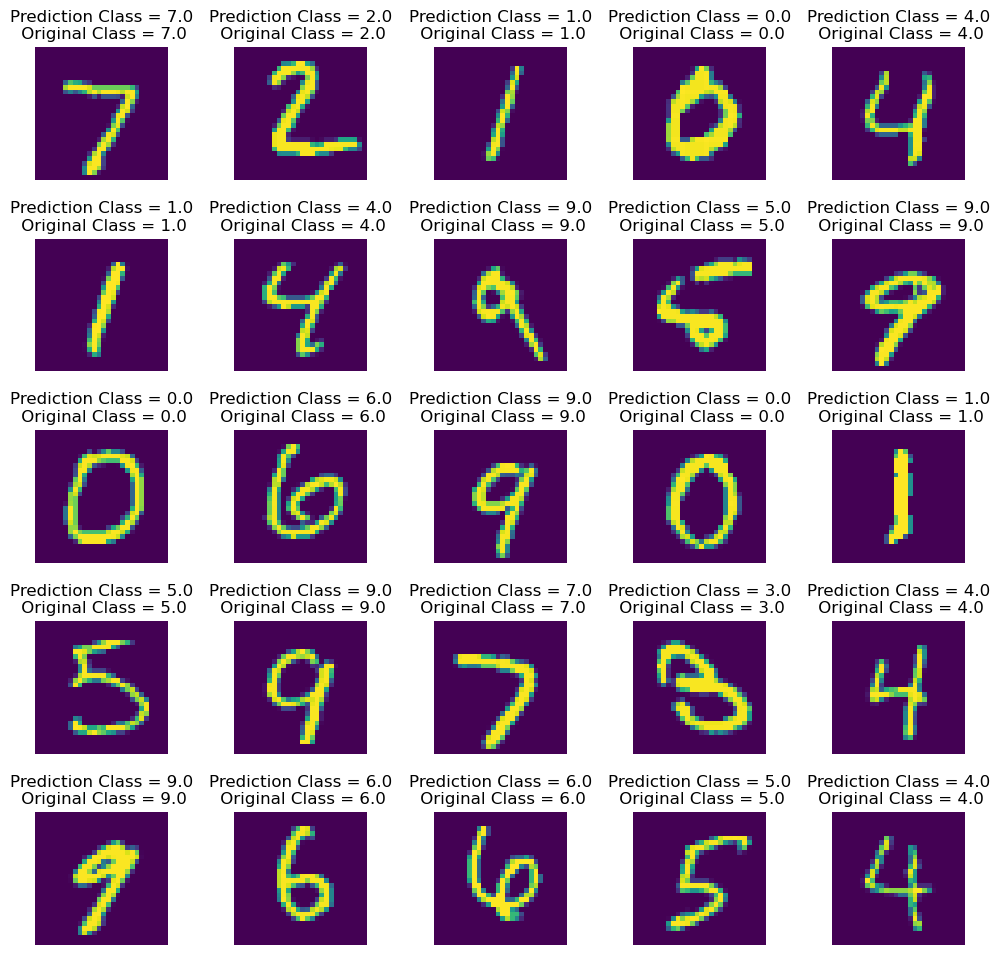

In [15]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W): 
    axes[i].imshow(x_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.1f}\n Original Class = {y_test[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)